In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")

In [10]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [11]:
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
training_set.shape

(1258, 1)

In [14]:
x_train=[]
y_train=[]

for i in  range(60,len(training_set_scaled)):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [15]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [16]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [17]:
x_train.shape

(1198, 60)

In [18]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [19]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [25]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

regressor.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 3s 70ms/step - loss: 0.0297 - accuracy: 0.0017
Epoch 2/10
38/38 [==============================] - 3s 67ms/step - loss: 0.0064 - accuracy: 0.0017
Epoch 3/10
38/38 [==============================] - 3s 69ms/step - loss: 0.0053 - accuracy: 0.0017
Epoch 4/10
38/38 [==============================] - 3s 69ms/step - loss: 0.0054 - accuracy: 0.0017
Epoch 5/10
38/38 [==============================] - 3s 69ms/step - loss: 0.0053 - accuracy: 0.0017
Epoch 6/10
38/38 [==============================] - 3s 69ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 7/10
38/38 [==============================] - 3s 73ms/step - loss: 0.0052 - accuracy: 0.0017
Epoch 8/10
38/38 [==============================] - 3s 72ms/step - loss: 0.0046 - accuracy: 0.0017
Epoch 9/10
38/38 [==============================] - 3s 70ms/step - loss: 0.0044 - accuracy: 0.0017
Epoch 10/10
38/38 [==============================] - 3s 70ms/step - loss: 0.0045 - accuracy: 0.0017


In [26]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(dataset_total.shape)
print(len(dataset_total))
print(len(dataset_test))

(1278,)
1278
20


In [28]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(80,)

In [29]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [30]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[794.705  ],
       [795.8361 ],
       [796.7206 ],
       [797.3764 ],
       [797.8564 ],
       [798.24994],
       [798.648  ],
       [799.114  ],
       [799.6896 ],
       [800.39355],
       [801.2237 ],
       [802.1592 ],
       [803.16736],
       [804.21716],
       [805.28033],
       [806.3721 ],
       [807.5354 ],
       [808.8306 ],
       [810.2937 ],
       [811.88025]], dtype=float32)

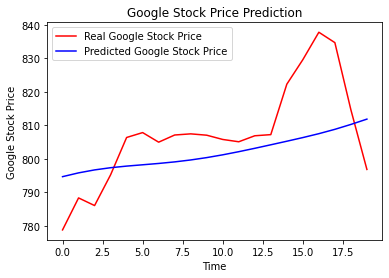

In [32]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()